In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [4]:
file_path = "https://raw.githubusercontent.com/IB38224/Meditechy-COVID_19-Group3/main/full_grouped.csv"

covid_data= pd.read_csv(file_path)
covid_data.info()
covid_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   Date.1         35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New cases      35156 non-null  int64 
 7   New deaths     35156 non-null  int64 
 8   New recovered  35156 non-null  int64 
 9   WHO Region     35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


,Date,Date.1,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,1/22/2020,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,1/22/2020,Albania,0,0,0,0,0,0,0,Europe
2,1/22/2020,Algeria,0,0,0,0,0,0,0,Africa
3,1/22/2020,Andorra,0,0,0,0,0,0,0,Europe
4,1/22/2020,Angola,0,0,0,0,0,0,0,Africa


In [5]:
# List of countries for your group - replace with the list for group three (3)

group_countries = [ 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini',
                   'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
                   'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
                   'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
                   'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
                   'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
                   'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo']

group_countries

['El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo']

In [7]:
covid_data = covid_data[covid_data['Date.1'].isin(group_countries)]
covid_data

,Date,Date.1,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
53,1/22/2020,El Salvador,0,0,0,0,0,0,0,Americas
54,1/22/2020,Equatorial Guinea,0,0,0,0,0,0,0,Africa
55,1/22/2020,Eritrea,0,0,0,0,0,0,0,Africa
56,1/22/2020,Estonia,0,0,0,0,0,0,0,Europe
57,1/22/2020,Eswatini,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35056,7/27/2020,Japan,31142,998,21970,8174,594,0,364,Western Pacific
35057,7/27/2020,Jordan,1176,11,1041,124,8,0,0,Eastern Mediterranean
35058,7/27/2020,Kazakhstan,84648,585,54404,29659,1526,0,1833,Europe
35059,7/27/2020,Kenya,17975,285,7833,9857,372,5,90,Africa


In [8]:
## Questions to address with/in the data
#Data Cleaning
 #Checking for missing values
print(covid_data.isnull().sum())


Date             0
Date.1           0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New cases        0
New deaths       0
New recovered    0
WHO Region       0
dtype: int64


In [9]:
# Removing duplicate rows if any
covid_data_no_duplicates = covid_data.drop_duplicates()
covid_data_no_duplicates


,Date,Date.1,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
53,1/22/2020,El Salvador,0,0,0,0,0,0,0,Americas
54,1/22/2020,Equatorial Guinea,0,0,0,0,0,0,0,Africa
55,1/22/2020,Eritrea,0,0,0,0,0,0,0,Africa
56,1/22/2020,Estonia,0,0,0,0,0,0,0,Europe
57,1/22/2020,Eswatini,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35056,7/27/2020,Japan,31142,998,21970,8174,594,0,364,Western Pacific
35057,7/27/2020,Jordan,1176,11,1041,124,8,0,0,Eastern Mediterranean
35058,7/27/2020,Kazakhstan,84648,585,54404,29659,1526,0,1833,Europe
35059,7/27/2020,Kenya,17975,285,7833,9857,372,5,90,Africa


In [10]:
# Renaming Date.1 columns
covid_data.rename(columns={'Date.1': 'Country'}, inplace=True)


In [11]:
covid_data.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
53,1/22/2020,El Salvador,0,0,0,0,0,0,0,Americas
54,1/22/2020,Equatorial Guinea,0,0,0,0,0,0,0,Africa
55,1/22/2020,Eritrea,0,0,0,0,0,0,0,Africa
56,1/22/2020,Estonia,0,0,0,0,0,0,0,Europe
57,1/22/2020,Eswatini,0,0,0,0,0,0,0,Africa


In [12]:
# total number of confirmed cases, deaths, and recoveries for each country

covid_data.groupby(['Country'])[['Confirmed', 'Deaths', 'Recovered']].sum()

""" Notably some countries had zero deaths while some had a large number of death rate. Eritrea, Fiji, Greenland, Grenada and Holy see had no recorded deaths"""


,Confirmed,Deaths,Recovered
Country,,,
El Salvador,453036,11429,240972
Equatorial Guinea,153258,2246,35352
Eritrea,11786,0,5724
Estonia,216505,6826,137224
Eswatini,63160,763,30185
Ethiopia,357928,5887,121793
Fiji,2266,0,1568
Finland,713167,30338,544492
France,21210926,3048524,7182115


In [14]:
# pivot table showing the total number of confirmed cases, deaths, and recoveries for each date and country

covid_data.pivot_table(index = 'Date', columns = 'Country', values = ['Confirmed', 'Deaths', 'Recovered'])


Confirmed                                                      \
Country   El Salvador Equatorial Guinea Eritrea Estonia Eswatini Ethiopia   
Date                                                                        
1/22/2020           0                 0       0       0        0        0   
1/23/2020           0                 0       0       0        0        0   
1/24/2020           0                 0       0       0        0        0   
1/25/2020           0                 0       0       0        0        0   
1/26/2020           0                 0       0       0        0        0   
...               ...               ...     ...     ...      ...      ...   
7/5/2020         7777              3071     215    1993      988     5846   
7/6/2020         8027              3071     215    1994     1011     5846   
7/7/2020         8307              3071     215    1995     1056     5846   
7/8/2020         8566              3071     215    2003     1138     6774   
7/9/2020         8844              3071     232    2011     1213     6973   

                                      ... Recovered                         \
Country   Fiji Finland  France Gabon  ...      Iraq Ireland Israel   Italy   
Date                                  ...                                    
1/22/2020    0       0       0     0  ...         0       0      0       0   
1/23/2020    0       0       0     0  ...         0       0      0       0   
1/24/2020    0       0       2     0  ...         0       0      0       0   
1/25/2020    0       0       3     0  ...         0       0      0       0   
1/26/2020    0       0       3     0  ...         0       0      0       0   
...        ...     ...     ...   ...  ...       ...     ...    ...     ...   
7/5/2020    19    7253  204222  5620  ...     33017   23364  17950  192108   
7/6/2020    21    7257  205597  5743  ...     34741   23364  18056  192241   
7/7/2020    21    7262  206072  5743  ...     36252   23364  18227  192815   
7/8/2020    21    7265  206072  5871  ...     37879   23364  18338  193640   
7/9/2020    26    7273  207356  5871  ...     39502   23364  18452  193978   

                                                         
Country   Jamaica  Japan Jordan Kazakhstan Kenya Kosovo  
Date                                                     
1/22/2020       0      0      0          0     0      0  
1/23/2020       0      0      0          0     0      0  
1/24/2020       0      0      0          0     0      0  
1/25/2020       0      0      0          0     0      0  
1/26/2020       0      1      0          0     0      0  
...           ...    ...    ...        ...   ...    ...  
7/5/2020      584  16870    942      15860  2287   1874  
7/6/2020      591  17007    957      15860  2414   1902  
7/7/2020      599  17057    969      16298  2504   1946  
7/8/2020      600  17057    977      35137  2593   2003  
7/9/2020      603  17412    982      35137  2657   2063  

[188 rows x 117 columns]

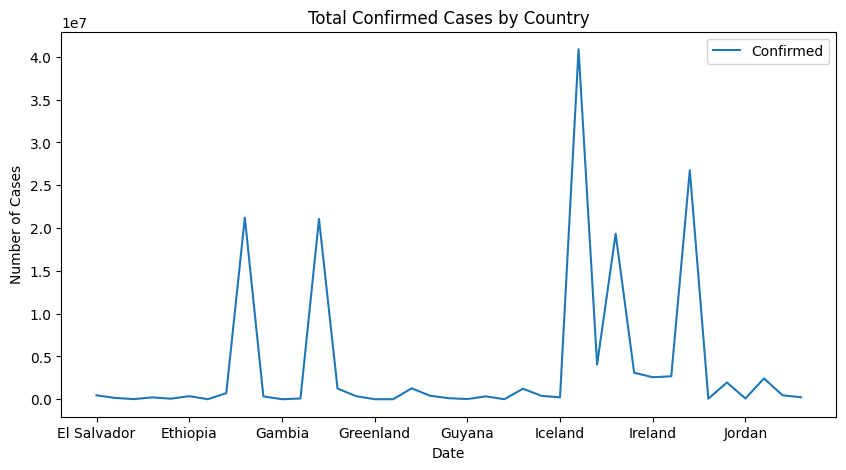

In [15]:
# total number of confirmed cases over time

covid_data.groupby(['Country'])[['Confirmed']].sum().plot(kind='line', figsize=(10, 5))
plt.title('Total Confirmed Cases by Country')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


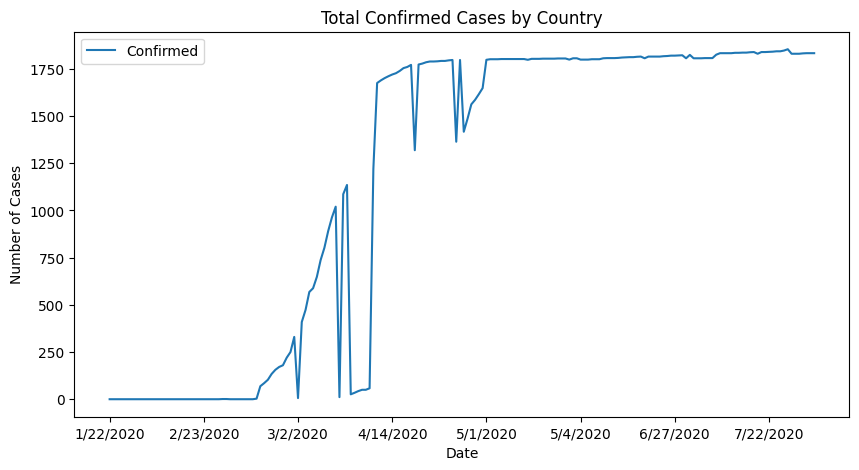

In [18]:
# a line plot showing the trend of confirmed cases over time for Iceland

covid_data[covid_data['Country'] == 'Iceland'].groupby(['Date'])[['Confirmed']].sum().plot(kind='line', figsize=(10, 5))
plt.title('Total Confirmed Cases by Country')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


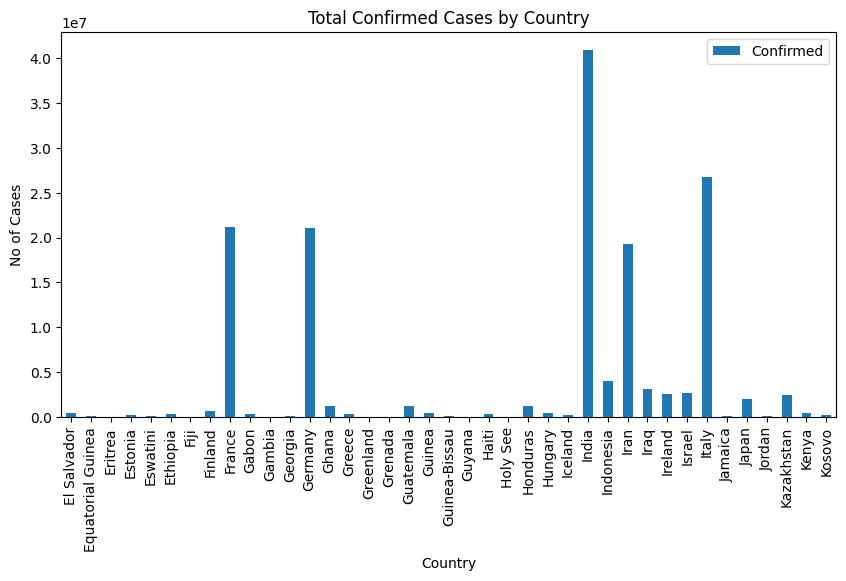

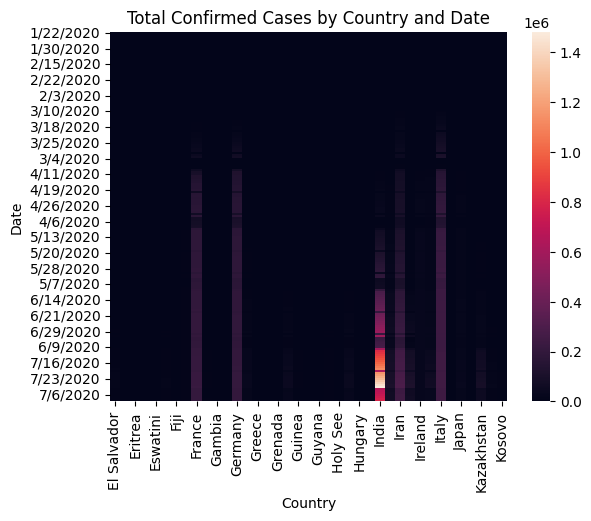

In [21]:
# barplot showing the total number of confirmed cases

covid_data.groupby(['Country'])[['Confirmed']].sum().plot(kind='bar', figsize=(10, 5))
plt.title('Total Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('No of Cases')
plt.show()

# heatmap showing the total number of confirmed cases

sbn.heatmap(covid_data.pivot_table(index = 'Date', columns = 'Country', values = 'Confirmed'))
plt.title('Total Confirmed Cases by Country and Date')
plt.xlabel('Country')
plt.ylabel('Date')
plt.show()
